Modelos de Regresion

1. Regresion Lineal

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xgboost as xgb
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV

db_ipsa = pd.read_csv('Clean_BD_IPSA_1940.csv')
drop_ipsa = db_ipsa.drop(columns=["TCH","Unnamed: 0", "Id", "NOME","TAL", "sacarosa", "catSac"])
tch_ipsa = db_ipsa["TCH"]
sac_ipsa = db_ipsa["sacarosa"]
catSac_ipsa =  db_ipsa["catSac"]

db_amarillos = pd.read_csv('Clean_HISTORICO_SUERTES_AMARILLOS.csv')
drop_amarillos = db_amarillos.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora", "catSac"])
tch_amarillos = db_amarillos["TCH"]
sac_amarillos = db_amarillos["%Sac.Caña"]
catSac_amarillos = db_amarillos["catSac"]

db_azules = pd.read_csv('Clean_HISTORICO_SUERTES_AZULES.csv')
drop_azules = db_azules.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora", "catSac"])
tch_azules = db_azules["TCH"]
sac_azules = db_azules["%Sac.Caña"]
catSac_azules = db_azules["catSac"]

# Regresion

In [2]:
db_ipsa.head()

,Unnamed: 0,Id,NOME,FAZ,TAL,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea,catSac
0,0,11,AMAIME SILCA,81291,40,0.8,8.3,12.3,4,12.7,2.4,14.0,12,202012,112,137,3,6.2,2
1,1,12,AMAIME SILCA,81291,41,0.8,6.3,11.2,2,7.8,2.3,13.0,3,201903,157,0,3,3.5,1
2,2,13,AMAIME SILCA,81291,41,0.6,7.9,12.2,3,8.8,1.8,13.3,3,202003,167,68,3,4.3,2
3,3,15,AMAIME SILCA,81291,43,0.8,6.6,13.1,1,6.1,2.5,13.4,3,201903,156,0,3,3.5,2
4,4,16,AMAIME SILCA,81291,43,0.6,8.1,12.2,2,7.9,2.1,14.0,3,202003,151,68,3,4.3,2


In [3]:
db_amarillos.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo,DS_indicator,catSac,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,13972,202202,80101,0,11.0,0,0,0.240154,0.025522,0,...,510.8,1523.1,420.8,1744.2,True,0,11,2017,11,2022
1,13973,202202,80101,0,11.0,1,0,0.099385,0.025522,1,...,510.8,1523.1,420.8,1744.2,True,0,2,2021,2,2022
2,13974,202202,80102,0,11.0,2,1,0.202308,0.020882,0,...,468.1,1422.3,421.7,1716.2,True,0,4,2019,4,2022
3,13975,202202,80102,0,11.0,3,2,0.017692,0.020882,2,...,505.4,1530.9,423.4,1765.5,True,0,7,2016,7,2022
4,13976,202202,80102,0,11.0,4,3,0.316923,0.020882,2,...,459.5,1430.4,420.0,1719.1,True,0,10,2018,10,2022


In [4]:
db_azules.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,DS_indicator,catSac,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,0,201701,80493,0,51.0,0,0,0.092308,0.027742,0,...,102.0,482.0,0.0,0.001238,False,2,8,2010,1,2017
1,1,201701,81284,1,81.0,1,1,0.022308,0.164582,0,...,0.0,0.0,0.0,0.002658,False,1,1,2011,1,2017
2,2,201701,80203,1,31.0,2,2,0.126769,0.148387,1,...,113.0,457.0,0.0,0.001572,True,0,10,2011,1,2017
3,3,201701,81380,1,82.0,3,3,0.016154,0.429032,2,...,0.0,0.0,0.0,0.001934,False,0,3,2014,1,2017
4,4,201701,80298,2,31.0,4,4,0.069692,0.109677,3,...,188.0,284.0,0.0,0.001698,True,0,1,2013,1,2017


## Regresion Lineal

### IPSA

In [79]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_ipsa, sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_ipsa, tch_ipsa, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [80]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.6961809657167379
R^2: 0.1983973468814605

Modelo para estimar el TCH:
RMSE: 22.849349262782045
R^2: 0.07522901191601272


### Amarillos

In [81]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_amarillos, sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_amarillos, tch_amarillos, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [82]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.02501886301759522
R^2: 0.8677953886420884

Modelo para estimar el TCH:
RMSE: 0.06580781783338181
R^2: 0.6065466824811421


### Azul

In [83]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_azules, sac_azules, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_azules, tch_azules, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [85]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.030881542910262127
R^2: 0.7547146054526048

Modelo para estimar el TCH:
RMSE: 0.06855292715116766
R^2: 0.5983140604249246


## XGBOOST

### IPSA

In [97]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_ipsa, sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_ipsa, tch_ipsa, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 10, n_estimators = 100, learning_rate = 0.1)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 10, n_estimators = 500, learning_rate = 0.1)
xgbModelTCH.fit(X_train, y_TCH_train)

param_grid = {
    "learning_rate": [0.1, 0.01],
    "n_estimators": [100, 500],
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelSac, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelTCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros sacarosa: {'learning_rate': 0.1, 'n_estimators': 100}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros tch: {'learning_rate': 0.01, 'n_estimators': 500}


In [86]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_ipsa, sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_ipsa, tch_ipsa, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.3, max_depth = 5, n_estimators = 100, learning_rate = 0.1)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 5, n_estimators = 500, learning_rate = 0.1)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [87]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.6007288330840811
R^2: 0.4031409130389907

Modelo para estimar el TCH:
RMSE: 19.941898921391356
R^2: 0.29559963941574097


In [ ]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_amarillos, sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_amarillos, tch_amarillos, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.3, max_depth = 10, n_estimators = 100, learning_rate = 0.1)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.3, max_depth = 10, n_estimators = 500, learning_rate = 0.1)
xgbModelTCH.fit(X_train, y_TCH_train)

param_grid = {
    "gamma": [0.1, 0.3],
    'max_depth': [5, 15],
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelSac, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelTCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros sacarosa: {'gamma': 0.1, 'max_depth': 5}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros tch: {'gamma': 0.1, 'max_depth': 15}


In [88]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_amarillos, sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_amarillos, tch_amarillos, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 5, n_estimators = 100, learning_rate = 0.3)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 15, n_estimators = 500, learning_rate = 0.3)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [89]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.023898236366944412
R^2: 0.879373377007062

Modelo para estimar el TCH:
RMSE: 0.04943337918394041
R^2: 0.7779867829966969


In [56]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_azules, sac_azules, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_azules, tch_azules, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.3, max_depth = 10, n_estimators = 100, learning_rate = 0.3)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.3, max_depth = 10, n_estimators = 100, learning_rate = 0.1)
xgbModelTCH.fit(X_train, y_TCH_train)

param_grid = {
    "gamma": [0.1, 0.3],
    'max_depth': [5, 15],
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelSac, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgbModelTCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros sacarosa: {'gamma': 0.1, 'max_depth': 15}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros tch: {'gamma': 0.1, 'max_depth': 15}


In [90]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_azules, sac_azules, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_azules, tch_azules, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 15, n_estimators = 100, learning_rate = 0.3)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 15, n_estimators = 100, learning_rate = 0.1)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [91]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.02112310100796808
R^2: 0.8852403910861044

Modelo para estimar el TCH:
RMSE: 0.032245881775744466
R^2: 0.9111242788096622


## SVM

### IPSA

In [94]:
scaler = StandardScaler()
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(scaler.fit_transform(drop_ipsa), sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(scaler.fit_transform(drop_ipsa), tch_ipsa, test_size=0.3, random_state=42)

svm_model_TCH = SVR(kernel='rbf', gamma='scale', C=10)
svm_model_TCH.fit(X_train, y_TCH_train)

svm_model_sacarosa = SVR(kernel='sigmoid', gamma='scale', C=0.1)
svm_model_sacarosa.fit(X_train, y_sacarosa_train)

param_grid = {
    'epsilon': [0.1, 0.3, 0.5]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_sacarosa, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_TCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros sacarosa: {'epsilon': 0.5}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros tch: {'epsilon': 0.5}


In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='sigmoid', gamma='scale', C=0.1, epsilon=0.5)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("TCH: ",accuracy_sacarosa)

Sacarosa:  0.07876638350203213


In [96]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.3)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("TCH: ",accuracy_sacarosa)

TCH:  0.1691784078707237


### Amarillos

In [11]:
scaler = StandardScaler()
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(scaler.fit_transform(drop_amarillos), sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(scaler.fit_transform(drop_amarillos), tch_amarillos, test_size=0.3, random_state=42)

svm_model_TCH = SVR(kernel='rbf', gamma='scale', C=10)
svm_model_TCH.fit(X_train, y_TCH_train)

svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_sacarosa_train)

param_grid = {
    'epsilon': [0.1, 0.3, 0.5]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_sacarosa, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_TCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros sacarosa: {'epsilon': 0.1}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros tch: {'epsilon': 0.1}


In [12]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1, epsilon=0.1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.4922017083709599


In [13]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.5837636240672641


### Azules

In [19]:
scaler = StandardScaler()
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(scaler.fit_transform(drop_amarillos), sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(scaler.fit_transform(drop_amarillos), tch_amarillos, test_size=0.3, random_state=42)

svm_model_TCH = SVR(kernel='rbf', gamma='scale', C=10)
svm_model_TCH.fit(X_train, y_TCH_train)

svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_sacarosa_train)

param_grid = {
    "epsilon": [0.1, 0.3, 0.5]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_sacarosa, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_sacarosa_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model_TCH, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_TCH_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros tch:", grid_search.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros sacarosa: {'epsilon': 0.1}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores hiperparámetros tch: {'epsilon': 0.1}


In [20]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1, epsilon=0.1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.6068733878436419


In [21]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.6495703033564595


# Clasificación

## Regresion Logistica

### IPSA

In [37]:
import warnings

warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_ipsa), catSac_ipsa, test_size=0.3, random_state=42)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)


param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    "max_iter": [100, 1000, 10000, 1000000 ]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)


Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores hiperparámetros sacarosa: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [72]:
X_train, X_test, y_train, y_test = train_test_split(drop_ipsa, catSac_ipsa, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'liblinear')
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

In [73]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 1.0

Matriz de Confusión:
 [[167   0   0]
 [  0 159   0]
 [  0   0 215]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       215

    accuracy                           1.00       541
   macro avg       1.00      1.00      1.00       541
weighted avg       1.00      1.00      1.00       541



### Amarillo

In [34]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_amarillos), catSac_amarillos, test_size=0.3, random_state=42)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)


param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    "max_iter": [100, 1000, 10000, 1000000 ]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores hiperparámetros sacarosa: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_amarillos), catSac_amarillos, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(C= 0.1, max_iter= 1000, penalty= 'l1', solver= 'saga')
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

In [44]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 1.0

Matriz de Confusión:
 [[835   0   0]
 [  0 193   0]
 [  0   0 284]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       284

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



### Azul

In [45]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_azules), catSac_azules, test_size=0.3, random_state=42)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)


param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    "max_iter": [100, 1000, 10000, 1000000 ]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores hiperparámetros sacarosa: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
X_train, X_test, y_train, y_test = train_test_split(drop_azules, catSac_azules, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'liblinear')
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

In [47]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 1.0

Matriz de Confusión:
 [[3393    0    0]
 [   0 1105    0]
 [   0    0 1676]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      1.00      1.00      1105
           2       1.00      1.00      1.00      1676

    accuracy                           1.00      6174
   macro avg       1.00      1.00      1.00      6174
weighted avg       1.00      1.00      1.00      6174



## Xgboost

### IPSA

In [67]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_ipsa), catSac_ipsa, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5, n_estimators = 500)
xgb_model.fit(X_train, y_train)


param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    "n_estimators": [100, 500, 1000],
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores hiperparámetros sacarosa: {'learning_rate': 0.1, 'n_estimators': 100}


In [68]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(drop_ipsa, catSac_ipsa, test_size=0.2, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5, n_estimators = 100,learning_rate = 0.1)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 1.0


In [69]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 1.0

Matriz de Confusión:
 [[106   0   0]
 [  0 111   0]
 [  0   0 144]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       144

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



In [70]:
X_train, X_test, y_train, y_test = train_test_split(drop_amarillos, catSac_amarillos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred, average="weighted")
print("Precisión en el conjunto de prueba:", accuracy)
print(recall)

Precisión en el conjunto de prueba: 1.0
1.0


Varianza explicada por cada componente principal:
Componente 1: 0.1523
Componente 2: 0.0963
Componente 3: 0.0695
Componente 4: 0.0588
Componente 5: 0.0509
Componente 6: 0.0407
Componente 7: 0.0383
Componente 8: 0.0373
Componente 9: 0.0359
Componente 10: 0.0308
Componente 11: 0.0291
Componente 12: 0.0237
Componente 13: 0.0210
Componente 14: 0.0205
Componente 15: 0.0179
Componente 16: 0.0169
Componente 17: 0.0167
Componente 18: 0.0162
Componente 19: 0.0158
Componente 20: 0.0147
Componente 21: 0.0131
Componente 22: 0.0127
Componente 23: 0.0125
Componente 24: 0.0115
Componente 25: 0.0114
Componente 26: 0.0108
Componente 27: 0.0107
Componente 28: 0.0096
Componente 29: 0.0092
Componente 30: 0.0085
Componente 31: 0.0080
Componente 32: 0.0076
Componente 33: 0.0065
Componente 34: 0.0060
Componente 35: 0.0058
Componente 36: 0.0057
Componente 37: 0.0051
Componente 38: 0.0048
Componente 39: 0.0045
Componente 40: 0.0040
Componente 41: 0.0034
Componente 42: 0.0032
Componente 43: 0.0029
Componente 44

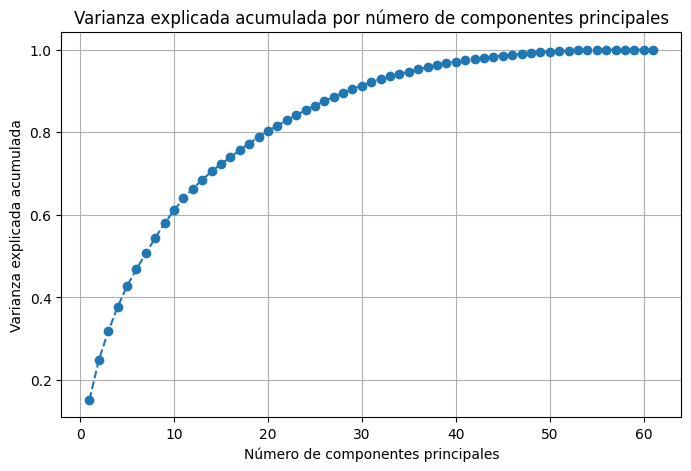

In [ ]:
#Calcular la varianza explicada acumulada

data_2=drop_amarillos
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(drop_azules, catSac_azules, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9458360094198245


Varianza explicada por cada componente principal:
Componente 1: 0.1500
Componente 2: 0.0867
Componente 3: 0.0670
Componente 4: 0.0535
Componente 5: 0.0478
Componente 6: 0.0456
Componente 7: 0.0383
Componente 8: 0.0361
Componente 9: 0.0338
Componente 10: 0.0308
Componente 11: 0.0259
Componente 12: 0.0253
Componente 13: 0.0230
Componente 14: 0.0227
Componente 15: 0.0221
Componente 16: 0.0218
Componente 17: 0.0211
Componente 18: 0.0189
Componente 19: 0.0186
Componente 20: 0.0174
Componente 21: 0.0167
Componente 22: 0.0163
Componente 23: 0.0155
Componente 24: 0.0148
Componente 25: 0.0145
Componente 26: 0.0133
Componente 27: 0.0118
Componente 28: 0.0113
Componente 29: 0.0108
Componente 30: 0.0091
Componente 31: 0.0088
Componente 32: 0.0084
Componente 33: 0.0075
Componente 34: 0.0070
Componente 35: 0.0061
Componente 36: 0.0059
Componente 37: 0.0051
Componente 38: 0.0045
Componente 39: 0.0030
Componente 40: 0.0017
Componente 41: 0.0014


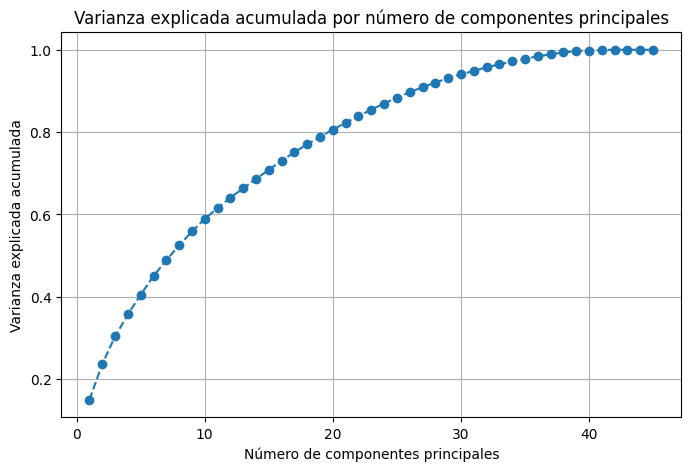

In [ ]:
#Calcular la varianza explicada acumulada

data_2=drop_azules
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

## SVM

### Amarillos

In [5]:
import warnings

warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_amarillos), catSac_amarillos, test_size=0.3, random_state=42)



param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    #'degree': [2, 3, 4]  # Solo se usará si kernel='poly'
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)


Mejores hiperparámetros sacarosa: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [14]:
# Sacarosa
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='linear', gamma='scale', C=100)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)
report = classification_report(y_test, y_pred_sacarosa)
print(report)

Sacarosa:  0.9375
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       835
           1       0.81      0.79      0.80       193
           2       0.91      0.92      0.91       284

    accuracy                           0.94      1312
   macro avg       0.90      0.90      0.90      1312
weighted avg       0.94      0.94      0.94      1312



### Azules

In [8]:
import warnings

warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_azules), catSac_azules, test_size=0.3, random_state=42)



param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto',  0.1, 1],
    #'degree': [2, 3, 4]  # Solo se usará si kernel='poly'
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)


Mejores hiperparámetros sacarosa: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [15]:

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='linear', gamma='scale', C=100)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)
report = classification_report(y_test, y_pred_sacarosa)
print(report)

Sacarosa:  0.9086491739552964
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3393
           1       0.80      0.72      0.76      1105
           2       0.92      0.91      0.91      1676

    accuracy                           0.91      6174
   macro avg       0.89      0.87      0.88      6174
weighted avg       0.91      0.91      0.91      6174



### IPSA

In [9]:
import warnings

warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(drop_ipsa), catSac_ipsa, test_size=0.3, random_state=42)



param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    #'degree': [2, 3, 4]  # Solo se usará si kernel='poly'|
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros sacarosa:", grid_search.best_params_)


Mejores hiperparámetros sacarosa: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [23]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='rbf', gamma='auto', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)
report = classification_report(y_test, y_pred_sacarosa)
print(report)

Sacarosa:  0.5194085027726433
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       167
           1       0.38      0.18      0.24       159
           2       0.57      0.71      0.63       215

    accuracy                           0.52       541
   macro avg       0.48      0.50      0.47       541
weighted avg       0.49      0.52      0.49       541



## PCA

### Amarillos

Número de componentes para conservar el 80% de la varianza: 21


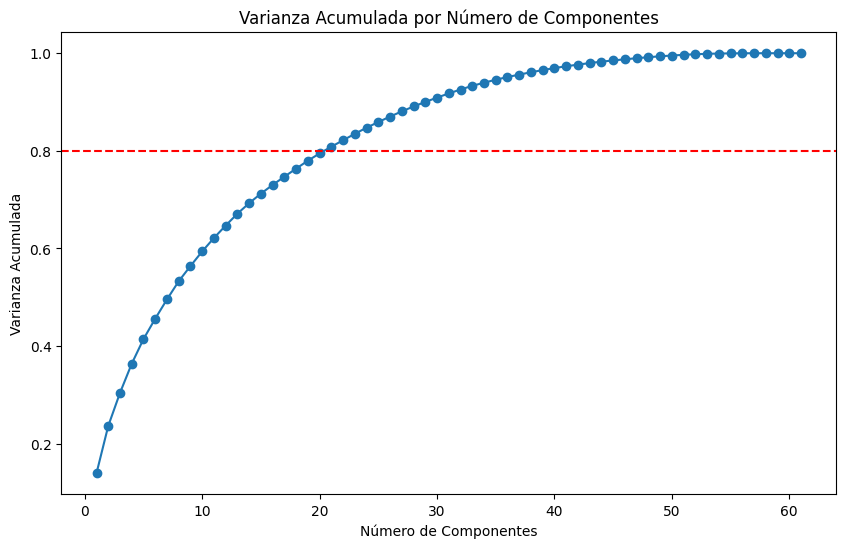

In [48]:
#Normalizar las características
scaler = StandardScaler()
data_normalized_amarillos = scaler.fit_transform(drop_amarillos)

#Aplicar PCA
pca_amarillos = PCA()
pca_amarillos.fit(data_normalized_amarillos)

#Varianza acumulada por cada componente
varianza_acumulada = np.cumsum(pca_amarillos.explained_variance_ratio_)

#Elegir el número de componentes para el 80% de varianza
n_componentes = np.argmax(varianza_acumulada >= 0.8) + 1

#Imprimir el número de componentes necesarios
print(f"Número de componentes para conservar el 80% de la varianza: {n_componentes}")

#Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Varianza Acumulada por Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.show()

### Azules

Número de componentes para conservar el 80% de la varianza: 20


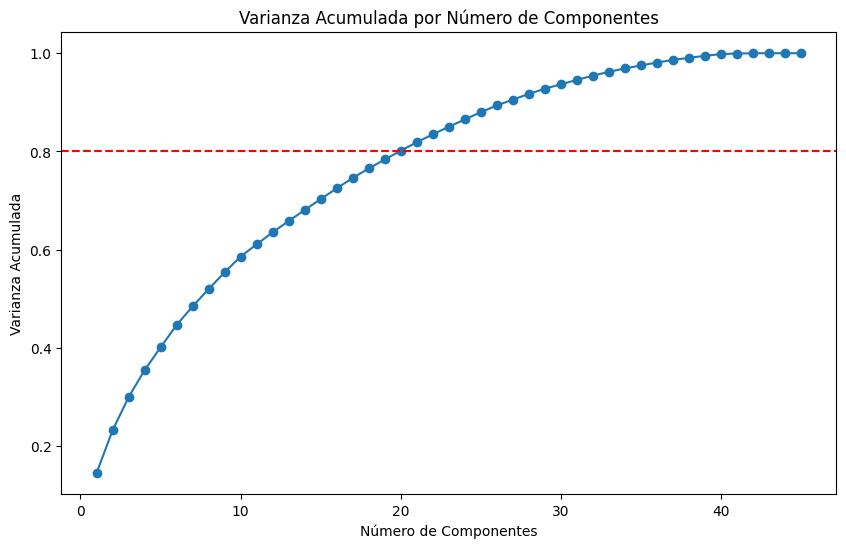

In [49]:
#Normalizar las características
scaler = StandardScaler()
data_normalized_azules = scaler.fit_transform(drop_azules)

#Aplicar PCA
pca_azules = PCA()
pca_azules.fit(data_normalized_azules)

#Varianza acumulada por cada componente
varianza_acumulada = np.cumsum(pca_azules.explained_variance_ratio_)

#Elegir el número de componentes para el 80% de varianza
n_componentes = np.argmax(varianza_acumulada >= 0.8) + 1

#Imprimir el número de componentes necesarios
print(f"Número de componentes para conservar el 80% de la varianza: {n_componentes}")

#Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Varianza Acumulada por Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.show()

### IPSA

Número de componentes para conservar el 80% de la varianza: 8


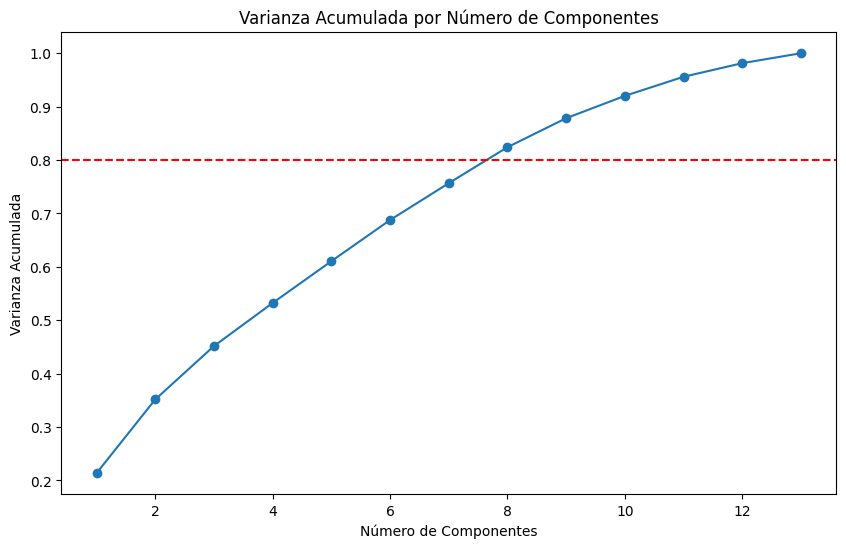

In [51]:
#Normalizar las características
scaler = StandardScaler()
data_normalized_ipsa = scaler.fit_transform(drop_ipsa)

#Aplicar PCA
pca_ipsa = PCA()
pca_ipsa.fit(data_normalized_ipsa)

#Varianza acumulada por cada componente
varianza_acumulada = np.cumsum(pca_ipsa.explained_variance_ratio_)

#Elegir el número de componentes para el 80% de varianza
n_componentes = np.argmax(varianza_acumulada >= 0.8) + 1

#Imprimir el número de componentes necesarios
print(f"Número de componentes para conservar el 80% de la varianza: {n_componentes}")

#Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Varianza Acumulada por Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.show()

## K-Means

### Ipsa

El mejor número de clústeres es: 2


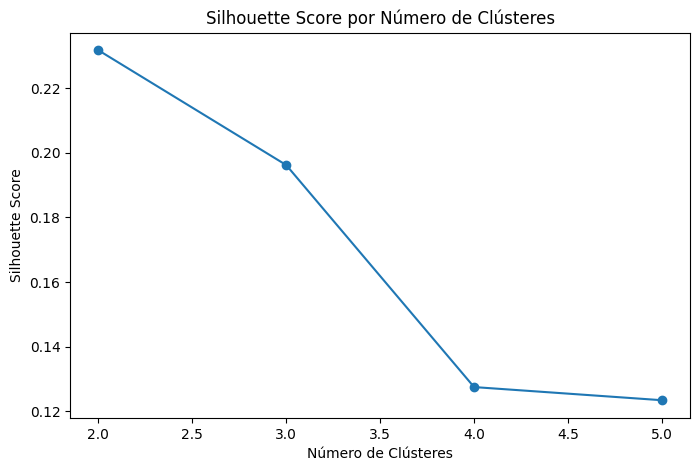

Características de cada clúster:
                  FAZ  dosismad   semsmad       edad    cortes        me  \
Cluster                                                                    
0        80553.230126  1.118550  9.756625  13.046583  2.207810  8.802789   
1        80634.339779  0.894015  7.832689  12.215285  3.303867  9.451473   

            vejez       mes        periodo     lluvias  grupo_tenencia  \
Cluster                                                                  
0        4.776430  7.746165  201823.227336  149.333333        2.206416   
1        3.639595  6.143646  201953.933702   54.247698        2.614180   

         pct_diatrea  
Cluster               
0           3.958298  
1           3.674401  


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicamos PCA con el número de componentes necesarios (n_componentes encontrado antes)
data_pca = pca_ipsa.transform(data_normalized_ipsa)[:, :8]

# Probar entre 2 y 5 clústeres
scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    scores.append(score)
    
# Determinar el número óptimo de clústeres
best_n_clusters = np.argmax(scores) + 2
print(f"El mejor número de clústeres es: {best_n_clusters}")

# Visualizar las puntuaciones de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), scores, marker='o')
plt.title("Silhouette Score por Número de Clústeres")
plt.xlabel("Número de Clústeres")
plt.ylabel("Silhouette Score")
plt.show()

# Aplicar K-means con el mejor número de clústeres encontrado
kmeans_final = KMeans(n_clusters=best_n_clusters, random_state=42)
drop_ipsa['Cluster'] = kmeans_final.fit_predict(data_pca)

# Caracterizar cada clúster según las variables originales
cluster_characteristics = drop_ipsa.groupby('Cluster').mean()
print("Características de cada clúster:")
print(cluster_characteristics)


### Amarillo

El mejor número de clústeres es: 2


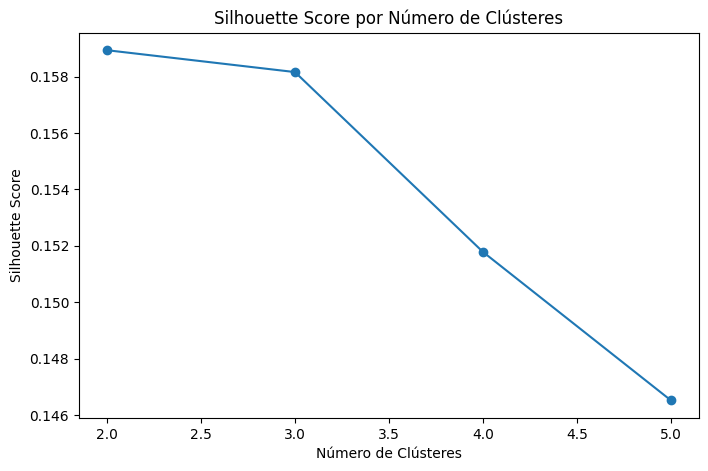

Características de cada clúster:
                  FAZ  dosismad   semsmad       edad    cortes        me  \
Cluster                                                                    
0        80553.230126  1.118550  9.756625  13.046583  2.207810  8.802789   
1        80634.339779  0.894015  7.832689  12.215285  3.303867  9.451473   

            vejez       mes        periodo     lluvias  grupo_tenencia  \
Cluster                                                                  
0        4.776430  7.746165  201823.227336  149.333333        2.206416   
1        3.639595  6.143646  201953.933702   54.247698        2.614180   

         pct_diatrea  
Cluster               
0           3.958298  
1           3.674401  


In [57]:
# Aplicamos PCA con el número de componentes necesarios (n_componentes encontrado antes)
data_pca = pca_amarillos.transform(data_normalized_amarillos)[:, :21]

# Probar entre 2 y 5 clústeres
scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    scores.append(score)
    
# Determinar el número óptimo de clústeres
best_n_clusters = np.argmax(scores) + 2
print(f"El mejor número de clústeres es: {best_n_clusters}")

# Visualizar las puntuaciones de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), scores, marker='o')
plt.title("Silhouette Score por Número de Clústeres")
plt.xlabel("Número de Clústeres")
plt.ylabel("Silhouette Score")
plt.show()

# Aplicar K-means con el mejor número de clústeres encontrado
kmeans_final = KMeans(n_clusters=best_n_clusters, random_state=42)
drop_amarillos['Cluster'] = kmeans_final.fit_predict(data_pca)

# Caracterizar cada clúster según las variables originales
cluster_characteristics = drop_ipsa.groupby('Cluster').mean()
print("Características de cada clúster:")
print(cluster_characteristics)


### Azules

El mejor número de clústeres es: 2


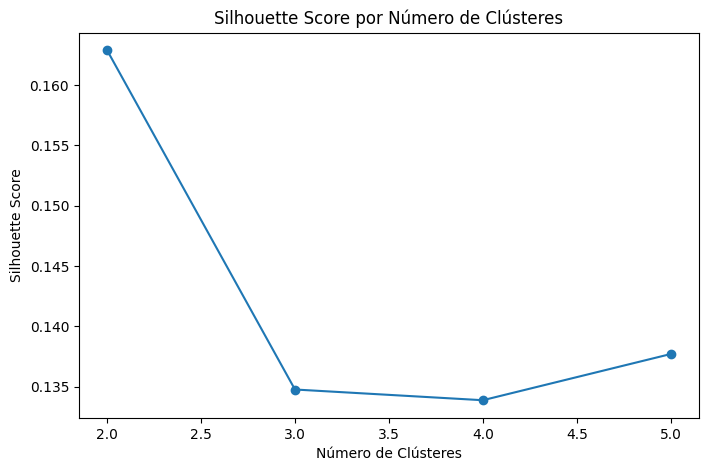

Características de cada clúster:
                  FAZ  dosismad   semsmad       edad    cortes        me  \
Cluster                                                                    
0        80553.230126  1.118550  9.756625  13.046583  2.207810  8.802789   
1        80634.339779  0.894015  7.832689  12.215285  3.303867  9.451473   

            vejez       mes        periodo     lluvias  grupo_tenencia  \
Cluster                                                                  
0        4.776430  7.746165  201823.227336  149.333333        2.206416   
1        3.639595  6.143646  201953.933702   54.247698        2.614180   

         pct_diatrea  
Cluster               
0           3.958298  
1           3.674401  


In [58]:
# Aplicamos PCA con el número de componentes necesarios (n_componentes encontrado antes)
data_pca = pca_azules.transform(data_normalized_azules)[:, :20]

# Probar entre 2 y 5 clústeres
scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    scores.append(score)
    
# Determinar el número óptimo de clústeres
best_n_clusters = np.argmax(scores) + 2
print(f"El mejor número de clústeres es: {best_n_clusters}")

# Visualizar las puntuaciones de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), scores, marker='o')
plt.title("Silhouette Score por Número de Clústeres")
plt.xlabel("Número de Clústeres")
plt.ylabel("Silhouette Score")
plt.show()

# Aplicar K-means con el mejor número de clústeres encontrado
kmeans_final = KMeans(n_clusters=best_n_clusters, random_state=42)
drop_azules['Cluster'] = kmeans_final.fit_predict(data_pca)

# Caracterizar cada clúster según las variables originales
cluster_characteristics = drop_ipsa.groupby('Cluster').mean()
print("Características de cada clúster:")
print(cluster_characteristics)
